<a href="https://colab.research.google.com/github/DommiiUdomp/CNN/blob/main/CNNdigitMNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data and Libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.utils.vis_utils import plot_model

In [121]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [122]:
ds, info = tfds.load('MNIST', split=['train', 'test'], with_info=True)
X_train_image, y_train_label = tfds.as_numpy(tfds.load('MNIST', split='train', batch_size=-1, as_supervised=True))
X_test_image, ytest_label = tfds.as_numpy(tfds.load('MNIST', split='test', batch_size=-1, as_supervised=True))
print(type(X_train_image), X_train_image.shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


<class 'numpy.ndarray'> (60000, 28, 28, 1)


# **Data Visualization**

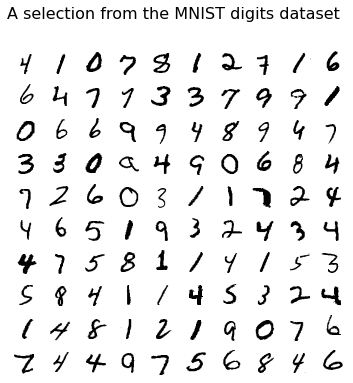

In [123]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X_train_image[idx].reshape((28, 28)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the MNIST digits dataset", fontsize=16)

In [124]:
label_names, label_y = np.unique(y_train_label, return_inverse=True)
label_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [125]:
aa = np.array(np.unique(label_y, return_counts=True)).T
aa

array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]])

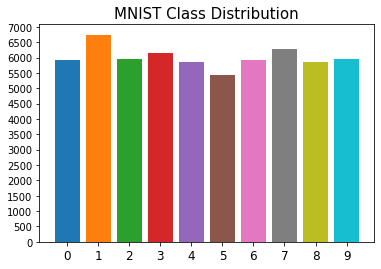

In [126]:
fig = plt.plot(figsize = (10,5))
for i in range(len(label_names)) :
  
  plt.bar(label_names[i], aa[i, 1], align='center')
  plt.xticks(label_names, fontsize=12, rotation=0)
  plt.yticks(np.arange(0, 7500, step=500))
  plt.title('MNIST Class Distribution', fontsize=15);

plt.show()

# **Data Prepprocessing**

In [127]:
from tensorflow.keras.utils import to_categorical

X_train = X_train_image.astype('float64') # Convert train and test images into 'float64' type
X_test = X_test_image.astype('float64')
#Normalize the images data #minimum and maximum values equal to 0 and 1 respectively.
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

y_train = y_train_label.astype('int64') # Convert train and test labels into 'int64' type
y_test = ytest_label.astype('int64')

# convert class vectors to binary class matrices
num_classes = len(np.array(np.unique(y_train_label)))
y_train_class = to_categorical(y_train, num_classes)
y_test_class = to_categorical(y_test, num_classes)

print(f'Min: {X_train.min()}, Max: {X_train.max()}')
print(f'New_Min: {X_train_scaled.min()}, New_Max: {X_train_scaled.max()}')

Min: 0.0, Max: 255.0
New_Min: 0.0, New_Max: 1.0


In [128]:
X_grey_train = np.average(X_train_scaled, axis=-1)
X_grey_test = np.average(X_test_scaled, axis=-1)
print(X_grey_train.shape)

(60000, 28, 28)


In [129]:
l_names = label_names.astype('int')

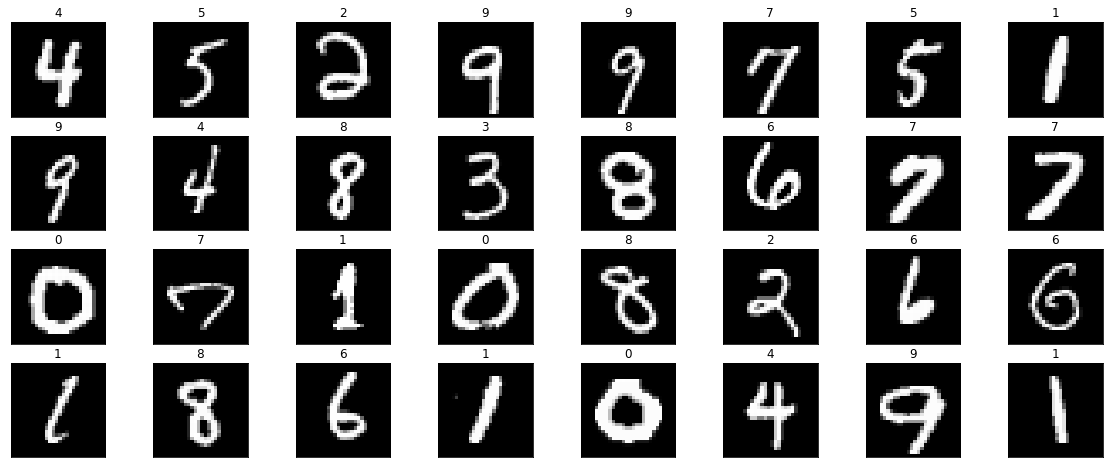

In [130]:
#Plot prepared Data
def random_plot(X,y):
  num_test_images = X_train_image.shape[0]
  random_inx = np.random.choice(num_test_images, 32)
  random_test_images = X_grey_train[random_inx, ...]
  random_test_labels = y_train_label[random_inx, ...]
  
  plt.figure(figsize=(20, 8))
  for i in range(32):
    plt.subplot(4, 8, i+1, xticks=[], yticks=[])
    plt.imshow(random_test_images[i], cmap = plt.cm.gray)
    plt.title(l_names[random_test_labels[i]])

  plt.show()

random_plot(X_test_image,y_train_label)

In [131]:
from sklearn.utils import shuffle

smallest_class = np.argmin(np.bincount(y_train_label)) # find the smallest class
print(f' the smallest class: {smallest_class}')

num_classes = len(np.array(np.unique(y_train_label))) # number of classes
print(f' the number of classes: {num_classes}')

smallest_class_obs = np.where(y_train_label == smallest_class)[0] # observations in smallest class
print(f' observations in smallest class:{smallest_class_obs.shape}')

# Get 2000 observations from each class
indBal = np.empty(0, dtype=int)
for i in range(num_classes):
  indTemp = shuffle(np.where(y_train_label == i)[0], random_state=42)[0:smallest_class_obs.shape[0]]
  indBal = np.concatenate([indBal, indTemp])

# shuffle the balanced index
indBal = shuffle(indBal, random_state = 101)

 the smallest class: 5
 the number of classes: 10
 observations in smallest class:(5421,)


In [13]:
#Make training dataset balance
y_trainclass_bal = y_train_class[indBal]
y_train_bal = y_train_label[indBal]
X_train_bal = X_train_scaled[indBal]
print(y_trainclass_bal.shape)
print(y_train_bal.shape)
print(X_train_bal.shape)

(54210, 10)
(54210,)
(54210, 28, 28, 1)


In [132]:
# One-hot encoding of train and test labels

# Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. 
# Hint: retain the channel dimension, which will now have size 1.
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_balbi = lb.fit_transform(y_trainclass_bal)
y_test_classbi = lb.fit_transform(y_test_class)
print(y_train_balbi.shape)
print(y_test_classbi.shape)

(54210, 10)
(10000, 10)


# **Creat Model (Flatten)**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 89,774
Trainable params: 89,774
Non-trainable params: 0
_________________________________________________________________


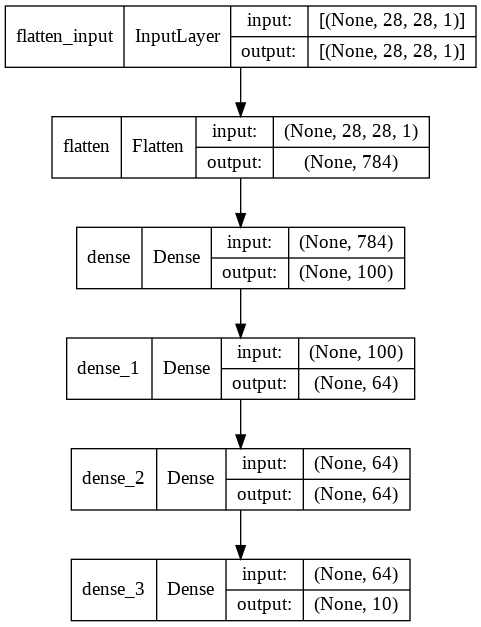

In [16]:
model_F = Sequential ( [
                      Flatten (input_shape = X_train_bal[0].shape),
                      Dense (100, activation = 'relu', kernel_initializer='he_normal',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-5) ),
                      Dense (64, activation = 'relu', kernel_initializer='he_normal',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-5)),
                      Dense (64, activation = 'relu', kernel_initializer='he_normal',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-5)),
                      Dense (10, activation = 'softmax'),])

model_F.compile ( optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
               loss = tf.keras.losses.CategoricalCrossentropy() ,
               metrics = [ tf.keras.metrics.CategoricalAccuracy() ])

model_F.summary()
plot_model(model=model_F,show_shapes=True)

In [17]:
tf.config.run_functions_eagerly(True)

# **Call Back**

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [19]:
checkpoint = ModelCheckpoint(filepath='/content/checkpoint/checkpoint001' , monitor = 'val_loss' ,
                             save_best_only=True, save_freq = 'epoch', verbose = 1 )

Early = EarlyStopping(monitor = 'val_loss', min_delta=10, patience=20, verbose = 1, 
                     mode = 'max', restore_best_weights=True)

Re = ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 20, verbose = 1,
                       mode = 'max' , min_delta=1e-8, cooldown=0, min_lr=0)

callback = [checkpoint, Early, Re]

In [20]:
history = model_F.fit(X_train_bal,y_train_balbi, validation_split= 0.15 , batch_size=28, 
                      epochs=100, verbose=1, callbacks = callback)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.3385 - categorical_accuracy: 0.9091
Epoch 00001: val_loss improved from inf to 0.19266, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 42s 25ms/step - loss: 0.3385 - categorical_accuracy: 0.9091 - val_loss: 0.1927 - val_categorical_accuracy: 0.9544 - lr: 0.0010
Epoch 2/100
1644/1646 [============================>.] - ETA: 0s - loss: 0.1770 - categorical_accuracy: 0.9585
Epoch 00002: val_loss improved from 0.19266 to 0.17148, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 44s 27ms/step - loss: 0.1769 - categorical_accuracy: 0.9585 - val_loss: 0.1715 - val_categorical_accuracy: 0.9620 - lr: 0.0010
Epoch 3/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.1408 - categorical_accuracy: 0.9694
Epoch 00003: val_loss improved from 0.17148 to 0.15751, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 42s 25ms/step - loss: 0.1408 - categorical_accuracy: 0.9694 - val_loss: 0.1575 - val_categorical_accuracy: 0.9647 - lr: 0.0010
Epoch 4/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.1206 - categorical_accuracy: 0.9755
Epoch 00004: val_loss improved from 0.15751 to 0.14875, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 45s 27ms/step - loss: 0.1205 - categorical_accuracy: 0.9755 - val_loss: 0.1488 - val_categorical_accuracy: 0.9694 - lr: 0.0010
Epoch 5/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.1071 - categorical_accuracy: 0.9797
Epoch 00005: val_loss did not improve from 0.14875
1646/1646 [==============================] - 40s 24ms/step - loss: 0.1071 - categorical_accuracy: 0.9798 - val_loss: 0.1512 - val_categorical_accuracy: 0.9695 - lr: 0.0010
Epoch 6/100
1646/1646 [==============================] - ETA: 0s - loss: 0.1012 - categorical_accuracy: 0.9818
Epoch 00006: val_loss did not improve from 0.14875
1646/1646 [==============================] - 40s 24ms/step - loss: 0.1012 - categorical_accuracy: 0.9818 - val_loss: 0.1715 - val_categorical_accuracy: 0.9631 - lr: 0.0010
Epoch 7/100
1644/1646 [============================>.] - ETA: 0s - loss: 0.0946 - categorical_accuracy: 0.9841
Epoch 00007: val_loss did not improve from 0.1487

# **Evaluate Model**

In [21]:
score = model_F.evaluate(X_train_bal, y_train_balbi, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1695/1695 [==============================] - 20s 12ms/step - loss: 0.1750 - categorical_accuracy: 0.9584
Test loss: 0.17499980330467224
Test accuracy: 0.9583656191825867


In [22]:
def plot_history(model, history) :
  plt.figure(figsize=(10,5))
  ax1 = plt.subplot(121)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training','Validation'],loc='lower left')
  ax2 = plt.subplot(122)
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Accuracy vs. epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training','Validation'],loc='lower right')
  plt.tight_layout()
  plt.show()

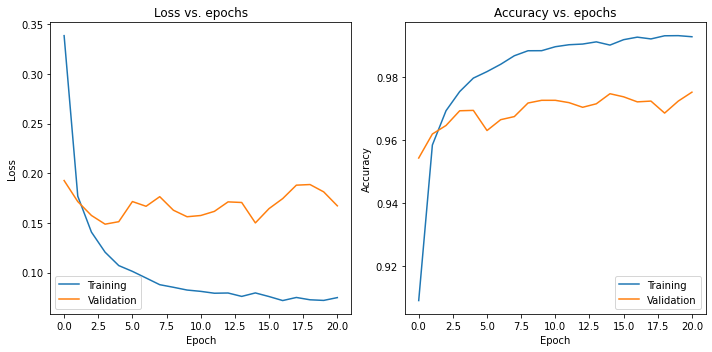

In [23]:
plot_history(model_F, history)

In [24]:
def eval_model_by_class(model, X_test_set, y_test_set):
  y_test_pred = model.predict(X_test_set)
  y_test_pred_tmp=np.argmax(y_test_pred,axis=1)

  y_test_true_tmp = np.argmax(y_test_set, axis = 1)
  label_count = np.unique(y_test_true_tmp, return_counts = True)[1]

  y_test_true = [label_names[x] for x in y_test_true_tmp]
  y_test_pred = [label_names[x] for x in y_test_pred_tmp]

  pred_df = pd.DataFrame({'y_true': y_test_true, 'y_pred': y_test_pred})
  pred_df['accurate_preds'] = pred_df.y_true == pred_df.y_pred
  pred_df = pred_df.groupby(['y_true']).sum().reset_index()
  pred_df['label_count'] = label_count
  pred_df['class_acc'] = pred_df.accurate_preds / pred_df.label_count
  pred_df = pred_df.sort_values(by = 'class_acc').reset_index()
  pred_df['overall_acc'] = sum(pred_df.accurate_preds) / sum(pred_df.label_count)
  pred_df = pred_df.sort_values('y_true').reset_index(drop = True)

  return(pred_df)

def find_wrong_preds(model, test_set, y_test_set):
  y_test_pred = model.predict(test_set)
  y_test_pred_tmp=np.argmax(y_test_pred,axis=1)

  y_test_true_tmp = np.argmax(y_test_set, axis = 1)
  label_count = np.unique(y_test_true_tmp, return_counts = True)[1]

  y_test_true = [label_names[x] for x in y_test_true_tmp]
  y_test_pred = [label_names[x] for x in y_test_pred_tmp]

  pred_df = pd.DataFrame({'y_true': y_test_true, 'y_pred': y_test_pred})
  pred_df['accurate_preds'] = pred_df.y_true == pred_df.y_pred
  # pred_df = pred_df.sort_values('y_true').reset_index(drop = True)
  pred_df = pred_df.sort_values('y_true')

  return(pred_df)

In [25]:
eval_model_by_class(model_F, X_test_scaled, y_test_classbi)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,index,y_true,y_pred,accurate_preds,label_count,class_acc,overall_acc
0,0,0,73,966,980,0.985714,0.9567
1,1,1,1163,1127,1135,0.992952,0.9567
2,2,2,2164,994,1032,0.963178,0.9567
3,3,3,3147,950,1010,0.940594,0.9567
4,4,4,4121,926,982,0.942974,0.9567
5,5,5,4427,838,892,0.939462,0.9567
6,6,6,5640,914,958,0.954071,0.9567
7,7,7,7059,968,1028,0.941634,0.9567
8,8,8,7614,937,974,0.962012,0.9567
9,9,9,8787,947,1009,0.938553,0.9567


In [26]:
find_wrong_preds(model_F, X_test_scaled, y_test_classbi)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,y_true,y_pred,accurate_preds
1289,0,0,True
5276,0,0,True
7630,0,0,True
9172,0,0,True
1243,0,0,True
...,...,...,...
2020,9,9,True
2026,9,1,False
7662,9,9,True
7643,9,9,True


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


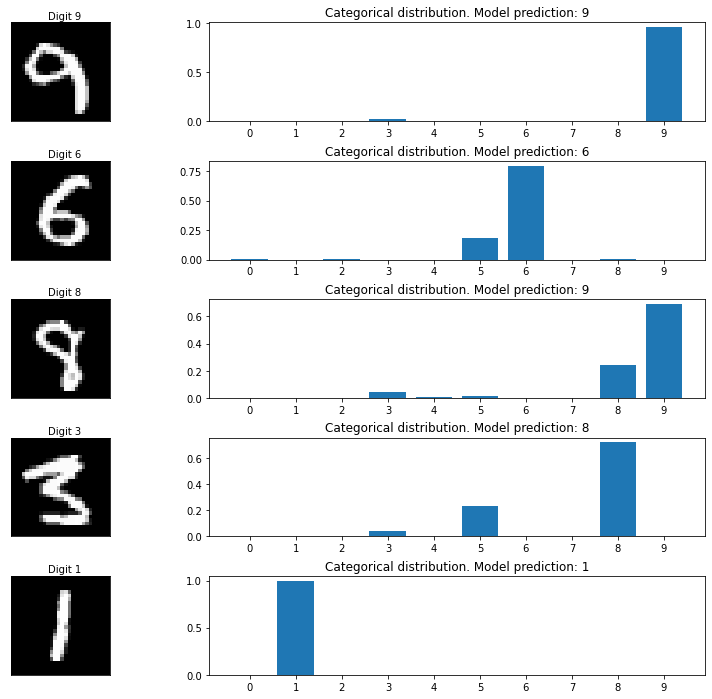

In [27]:
# Alongside the image and label, show each model’s predictive distribution as a bar chart, 
def plot_randsamples(model, test_sample, label_sample):
  num_test_images = test_sample.shape[0]
  random_inx = np.random.choice(num_test_images, 5)
  random_test_images = test_sample[random_inx, ...]
  random_test_labels = label_sample[random_inx, ...]

  predictions = model.predict(random_test_images)
# predictions_cnn = model_cnn.predict(random_test_images)

  fig, axes = plt.subplots(5, 2, figsize=(16, 12))
  fig.subplots_adjust(hspace=0.4, wspace=-0.2)
  for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image), cmap = plt.cm.gist_gray)
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

  plt.show()

plot_randsamples(model_F, X_grey_test, ytest_label)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


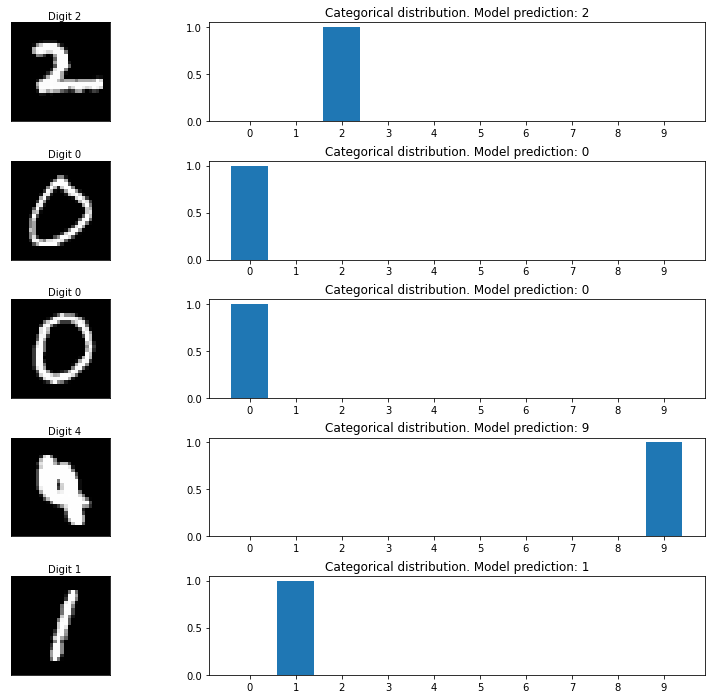

In [28]:
plot_randsamples(model_F, X_test_image, ytest_label)

# **Create Model CNN**

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         136       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         1032      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                100416    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

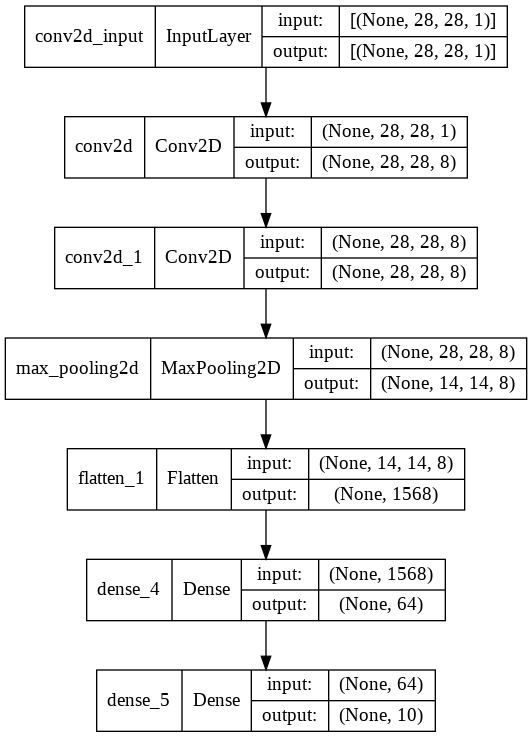

In [30]:
model_C = Sequential ( [
                      Conv2D (8, (4,4), activation = 'relu' , padding='same', input_shape = X_train_bal[0].shape),
                      Conv2D (8, (4,4), activation = 'relu' , padding = 'same'),
                      MaxPooling2D((2,2)),
                      Flatten(),
                      Dense (64, activation = 'relu', kernel_initializer='he_uniform',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-5) ),
                      Dense (10, activation = 'softmax'),])

model_C.compile ( optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
               loss = tf.keras.losses.CategoricalCrossentropy() ,
               metrics = [ tf.keras.metrics.CategoricalAccuracy() ])

model_C.summary()
plot_model(model = model_C, show_shapes=True)

In [31]:
history_C = model_C.fit(X_train_bal,y_train_balbi, validation_split= 0.15 , batch_size=28, 
                      epochs=100, verbose=1, callbacks = callback)

Epoch 1/100
   1/1646 [..............................] - ETA: 3:07 - loss: 3.2420 - categorical_accuracy: 0.1786

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1645/1646 [============================>.] - ETA: 0s - loss: 0.2092 - categorical_accuracy: 0.9448
Epoch 00001: val_loss improved from 0.14875 to 0.11063, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 99s 60ms/step - loss: 0.2093 - categorical_accuracy: 0.9448 - val_loss: 0.1106 - val_categorical_accuracy: 0.9760 - lr: 0.0010
Epoch 2/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.0885 - categorical_accuracy: 0.9805
Epoch 00002: val_loss improved from 0.11063 to 0.08730, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 105s 64ms/step - loss: 0.0885 - categorical_accuracy: 0.9805 - val_loss: 0.0873 - val_categorical_accuracy: 0.9823 - lr: 0.0010
Epoch 3/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.0702 - categorical_accuracy: 0.9856
Epoch 00003: val_loss improved from 0.08730 to 0.07958, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 97s 59ms/step - loss: 0.0702 - categorical_accuracy: 0.9856 - val_loss: 0.0796 - val_categorical_accuracy: 0.9834 - lr: 0.0010
Epoch 4/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.0593 - categorical_accuracy: 0.9888
Epoch 00004: val_loss improved from 0.07958 to 0.07219, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 98s 60ms/step - loss: 0.0593 - categorical_accuracy: 0.9888 - val_loss: 0.0722 - val_categorical_accuracy: 0.9852 - lr: 0.0010
Epoch 5/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.0538 - categorical_accuracy: 0.9907
Epoch 00005: val_loss improved from 0.07219 to 0.07001, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1646/1646 [==============================] - 98s 60ms/step - loss: 0.0538 - categorical_accuracy: 0.9907 - val_loss: 0.0700 - val_categorical_accuracy: 0.9867 - lr: 0.0010
Epoch 6/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.0500 - categorical_accuracy: 0.9919
Epoch 00006: val_loss did not improve from 0.07001
1646/1646 [==============================] - 102s 62ms/step - loss: 0.0500 - categorical_accuracy: 0.9919 - val_loss: 0.0742 - val_categorical_accuracy: 0.9870 - lr: 0.0010
Epoch 7/100
1645/1646 [============================>.] - ETA: 0s - loss: 0.0470 - categorical_accuracy: 0.9929
Epoch 00007: val_loss did not improve from 0.07001
1646/1646 [==============================] - 99s 60ms/step - loss: 0.0470 - categorical_accuracy: 0.9929 - val_loss: 0.0726 - val_categorical_accuracy: 0.9860 - lr: 0.0010
Epoch 8/100
1646/1646 [==============================] - ETA: 0s - loss: 0.0435 - categorical_accuracy: 0.9942
Epoch 00008: val_loss did not improve from 0.070

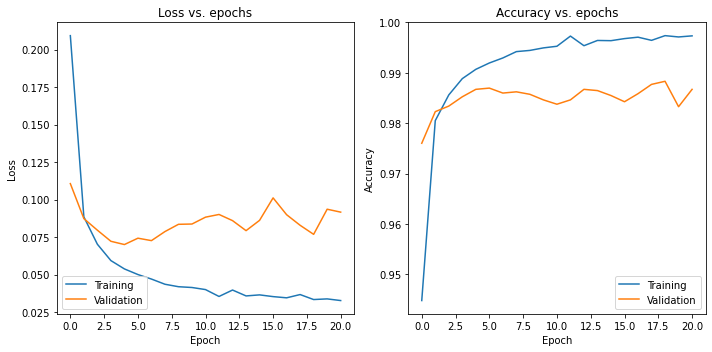

In [32]:
plot_history(model_C, history_C)

In [33]:
score = model_C.evaluate(X_train_bal, y_train_balbi, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

   5/1695 [..............................] - ETA: 45s - loss: 0.0755 - categorical_accuracy: 0.9875

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1695/1695 [==============================] - 38s 22ms/step - loss: 0.1017 - categorical_accuracy: 0.9766
Test loss: 0.1017194539308548
Test accuracy: 0.9765910506248474


In [34]:
score = model_C.evaluate(X_test_scaled, y_test_classbi, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  7/313 [..............................] - ETA: 6s - loss: 0.1122 - categorical_accuracy: 0.9821

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 7s 21ms/step - loss: 0.0991 - categorical_accuracy: 0.9759
Test loss: 0.09910564869642258
Test accuracy: 0.9758999943733215


In [35]:
eval_model_by_class(model_C, X_test_scaled, y_test_classbi)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,index,y_true,y_pred,accurate_preds,label_count,class_acc,overall_acc
0,0,0,43,972,980,0.991837,0.9759
1,1,1,1172,1124,1135,0.990308,0.9759
2,2,2,2091,1016,1032,0.984496,0.9759
3,3,3,3044,1003,1010,0.993069,0.9759
4,4,4,3960,963,982,0.980652,0.9759
5,5,5,4442,882,892,0.988789,0.9759
6,6,6,5681,939,958,0.980167,0.9759
7,7,7,7102,971,1028,0.944553,0.9759
8,8,8,7551,913,974,0.937372,0.9759
9,9,9,8910,976,1009,0.967294,0.9759


In [36]:
find_wrong_preds(model_C, X_test_scaled, y_test_classbi)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,y_true,y_pred,accurate_preds
1289,0,0,True
5276,0,0,True
7630,0,0,True
9172,0,0,True
1243,0,0,True
...,...,...,...
2020,9,9,True
2026,9,1,False
7662,9,9,True
7643,9,9,True


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


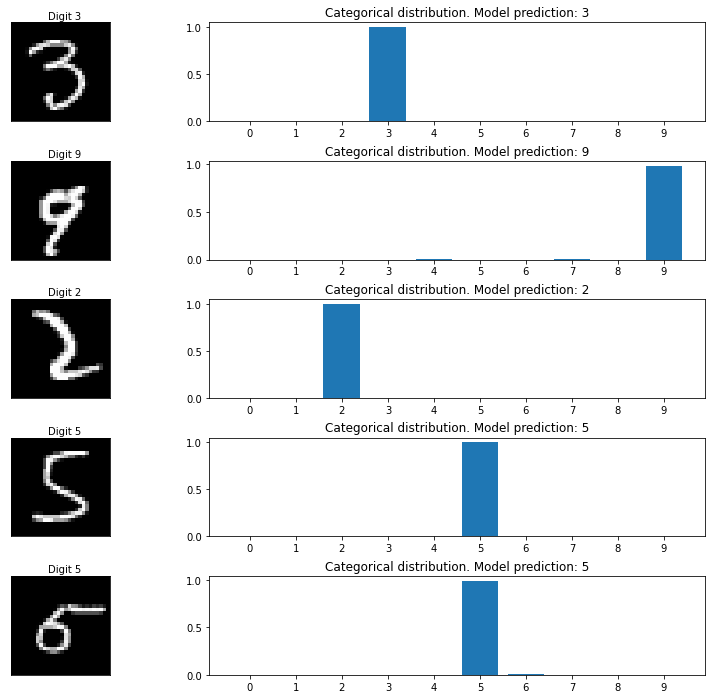

In [37]:
plot_randsamples(model_C,X_test_scaled, ytest_label)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                100416    
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1645/1646 [============================>.] - ETA: 0s - loss: 0.2578 - categorical_accuracy: 0.9416
Epoch 00001: val_loss did not improve from 0.07001
1646/1646 [==============================] - 64s 39ms/step - loss: 0.2577 - categorical_accuracy: 0.9416 - val_loss: 0.2089 - val_categorical_accuracy: 0.9622 - lr: 0.0100
Epoch 2/100
1646/1646 [==============================] - ETA: 0s - loss: 0.1946 - categorical_accuracy: 0.9691
Epoch 00002: val_loss did not improve from 0.07001
1646/1646 [==============================] - 64s 39ms/step - loss: 0.1946 - categorical_accuracy: 0.9691 - val_loss: 0.2248 - val_categorical_accuracy: 0.9611 - lr: 0.0100
Epoch 3/100
1646/1646 [==============================] - ETA: 0s - loss: 0.1992 - categorical_accuracy: 0.9709
Epoch 00003: val_loss did not improve from 0.07001
1646/1646 [==============================] - 64s 39ms/step - loss: 0.1992 - categorical_accuracy: 0.9709 - val_loss: 0.2093 - val_categorical_accuracy: 0.9728 - lr: 0.0100
Epoch 4/10

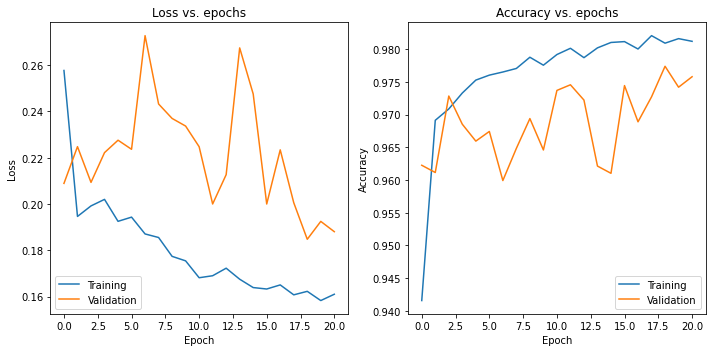

313/313 [==============================] - 6s 19ms/step - loss: 0.1989 - categorical_accuracy: 0.9647
Test loss: 0.1989334374666214
Test accuracy: 0.9646999835968018


,y_true,y_pred,accurate_preds
1289,0,0,True
5276,0,0,True
7630,0,0,True
9172,0,0,True
1243,0,0,True
...,...,...,...
2020,9,9,True
2026,9,1,False
7662,9,9,True
7643,9,9,True


In [38]:
model_CC = Sequential ( [
                      Conv2D (8, (3,3), activation = 'relu' , padding='same', input_shape = X_train_bal[0].shape),
                      MaxPooling2D(pool_size=(2,2)),
                      Flatten(),
                      Dense (64, activation = 'relu', kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                             kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5,l2=1e-5)),
                      Dense (64, activation = 'relu', kernel_initializer='glorot_uniform', bias_initializer='zeros',
                             kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5,l2=1e-5)),
                      Dense (10, activation = 'softmax')])

model_CC.compile ( optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),
               loss = tf.keras.losses.CategoricalCrossentropy() ,
               metrics = [ tf.keras.metrics.CategoricalAccuracy() ])

model_CC.summary()
plot_model(model = model_CC, show_shapes=True)

history_CC = model_CC.fit(X_train_bal,y_train_balbi, validation_split= 0.15 , batch_size=28, 
                      epochs=100, verbose=1, callbacks = callback)

plot_history(model_CC, history_CC)

score = model_CC.evaluate(X_test_scaled, y_test_classbi, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#eval_model_by_class(model_CC, X_test_scaled, y_test_classbi)
find_wrong_preds(model_CC, X_test_scaled, y_test_classbi)
#plot_randsamples(model_CC,X_test_scaled, ytest_label)

# **Create AutoEncoder Model**

In [133]:
#Make training dataset balance
X_greytrain_bal = X_grey_train[indBal]
print(X_greytrain_bal.shape)
print(y_trainclass_bal.shape)

(54210, 28, 28)
(54210, 10)


In [134]:
# flatten grayscale arrays
X_Ftrain = X_greytrain_bal.reshape(X_greytrain_bal.shape[0],
                                X_greytrain_bal.shape[1] * X_greytrain_bal.shape[2])

X_Ftest = X_grey_test.reshape(X_grey_test.shape[0],
                              X_grey_test.shape[1] * X_grey_test.shape[2])

print(X_Ftrain.shape)
print(X_Ftest.shape)
print(y_train_balbi.shape)

(54210, 784)
(10000, 784)
(54210, 10)


In [41]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense

In [135]:
input_size = 784
hidden_size = 28*5
code_size = 28

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), 
                    loss= tf.keras.losses.MSE)

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_21 (Dense)            (None, 140)               109900    
                                                                 
 dense_22 (Dense)            (None, 28)                3948      
                                                                 
 dense_23 (Dense)            (None, 140)               4060      
                                                                 
 dense_24 (Dense)            (None, 784)               110544    
                                                                 
Total params: 228,452
Trainable params: 228,452
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
   4/1937 [..............................] - ETA: 34s - loss: 0.2271 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1935/1937 [============================>.] - ETA: 0s - loss: 0.0261
Epoch 00001: val_loss did not improve from 0.00811
1937/1937 [==============================] - 37s 19ms/step - loss: 0.0261 - val_loss: 0.0150 - lr: 0.0010
Epoch 2/100
1935/1937 [============================>.] - ETA: 0s - loss: 0.0140
Epoch 00002: val_loss did not improve from 0.00811
1937/1937 [==============================] - 37s 19ms/step - loss: 0.0140 - val_loss: 0.0127 - lr: 0.0010
Epoch 3/100
1936/1937 [============================>.] - ETA: 0s - loss: 0.0122
Epoch 00003: val_loss did not improve from 0.00811
1937/1937 [==============================] - 37s 19ms/step - loss: 0.0122 - val_loss: 0.0115 - lr: 0.0010
Epoch 4/100
1935/1937 [============================>.] - ETA: 0s - loss: 0.0112
Epoch 00004: val_loss did not improve from 0.00811
1937/1937 [==============================] - 37s 19ms/step - loss: 0.0112 - val_loss: 0.0106 - lr: 0.0010
Epoch 5/100
1934/1937 [============================>.] - ETA: 0s

INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1937/1937 [==============================] - 40s 20ms/step - loss: 0.0082 - val_loss: 0.0080 - lr: 0.0010
Epoch 14/100
1937/1937 [==============================] - ETA: 0s - loss: 0.0081
Epoch 00014: val_loss improved from 0.00801 to 0.00787, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1937/1937 [==============================] - 37s 19ms/step - loss: 0.0081 - val_loss: 0.0079 - lr: 0.0010
Epoch 15/100
1937/1937 [==============================] - ETA: 0s - loss: 0.0080
Epoch 00015: val_loss improved from 0.00787 to 0.00782, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1937/1937 [==============================] - 39s 20ms/step - loss: 0.0080 - val_loss: 0.0078 - lr: 0.0010
Epoch 16/100
1937/1937 [==============================] - ETA: 0s - loss: 0.0079
Epoch 00016: val_loss did not improve from 0.00782
1937/1937 [==============================] - 37s 19ms/step - loss: 0.0079 - val_loss: 0.0081 - lr: 0.0010
Epoch 17/100
1936/1937 [============================>.] - ETA: 0s - loss: 0.0079
Epoch 00017: val_loss improved from 0.00782 to 0.00781, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1937/1937 [==============================] - 40s 21ms/step - loss: 0.0079 - val_loss: 0.0078 - lr: 0.0010
Epoch 18/100
1935/1937 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 00018: val_loss improved from 0.00781 to 0.00775, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1937/1937 [==============================] - 40s 21ms/step - loss: 0.0078 - val_loss: 0.0077 - lr: 0.0010
Epoch 19/100
1937/1937 [==============================] - ETA: 0s - loss: 0.0077
Epoch 00019: val_loss improved from 0.00775 to 0.00759, saving model to /content/checkpoint/checkpoint001
INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


INFO:tensorflow:Assets written to: /content/checkpoint/checkpoint001/assets


1937/1937 [==============================] - 37s 19ms/step - loss: 0.0077 - val_loss: 0.0076 - lr: 0.0010
Epoch 20/100
1937/1937 [==============================] - ETA: 0s - loss: 0.0077
Epoch 00020: val_loss did not improve from 0.00759
1937/1937 [==============================] - 39s 20ms/step - loss: 0.0077 - val_loss: 0.0077 - lr: 0.0010
Epoch 21/100
1935/1937 [============================>.] - ETA: 0s - loss: 0.0076
Epoch 00021: val_loss did not improve from 0.00759
Restoring model weights from the end of the best epoch: 1.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1937/1937 [==============================] - 37s 19ms/step - loss: 0.0076 - val_loss: 0.0077 - lr: 0.0010
Epoch 00021: early stopping


KeyError: ignored

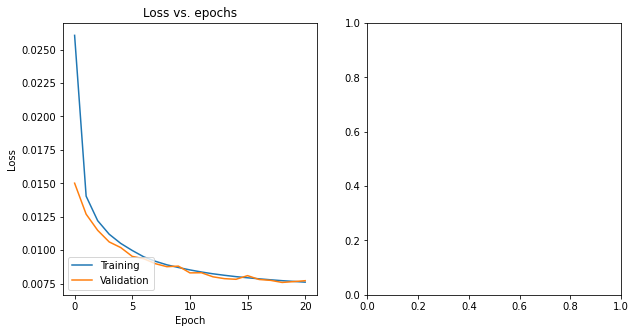

In [136]:
history_au = autoencoder.fit(X_Ftrain,X_Ftrain, validation_data= (X_Ftest,X_Ftest) , batch_size=28, 
                             epochs=100, verbose=1, callbacks = callback)

plot_history(autoencoder, history_au)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


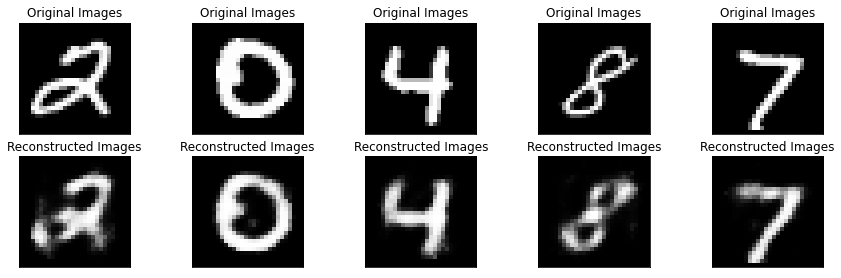

In [137]:
decoded_imgs = autoencoder.predict(X_Ftest)

# number of example digits to show
dims = (28,28)
n = 5
plt.figure(figsize=(15, 4.5))

for i in range(n):
  # plot original image
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_Ftest[i].reshape(*dims))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title('Original Images')

  # plot reconstruction 
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(*dims))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title('Reconstructed Images')
plt.show()

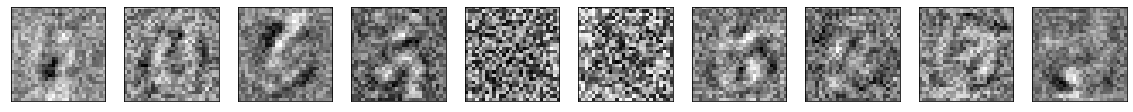

In [138]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

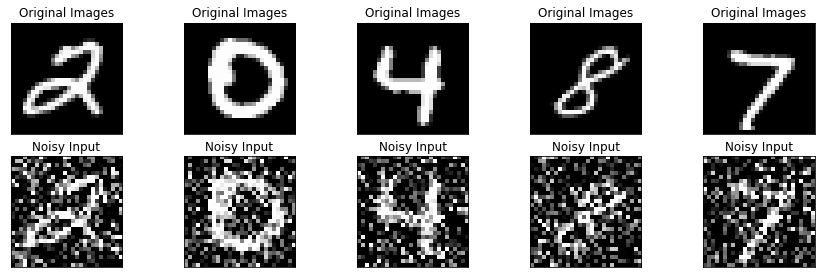

In [139]:
noise_factor = 0.5
x_train_noisy = X_Ftrain + noise_factor * np.random.normal(size=X_Ftrain.shape) 
x_test_noisy = X_Ftest + noise_factor * np.random.normal(size=X_Ftest.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(15, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_Ftest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy Input')

plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


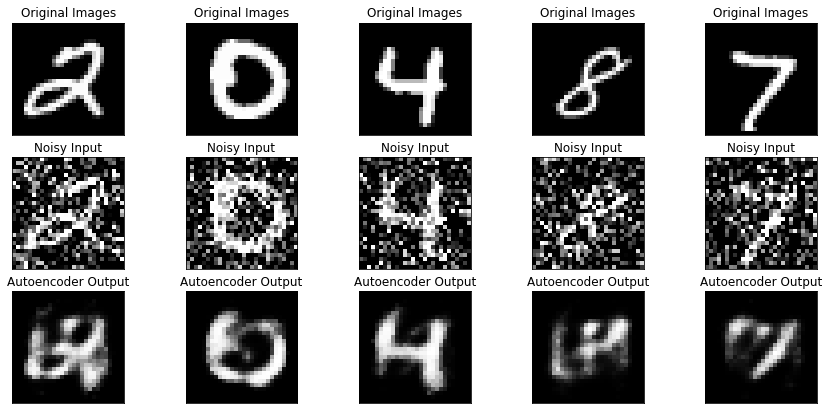

In [140]:
n = 5
plt.figure(figsize=(15, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_Ftest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Autoencoder Output')

plt.show()

# **Create Model (try) Multihead**

In [55]:
from keras.layers.merge import concatenate

In [56]:
X_Ftest.shape

(10000, 784)

In [57]:
images.shape

(10000, 784)

In [141]:
# first input model
head = Input(shape=(X_Ftrain[0].shape))
cnn1 = Dense(64, activation='relu')(head)
cnn1 = Flatten()(cnn1)

# second input model
cnn2 = Dense(64, activation='relu')(head)
cnn2 = Flatten()(cnn2)

# merge input models
merge = concatenate([cnn1, cnn2])
dense = Dense(28, activation='relu')(merge)
output = Dense(num_classes, activation='sigmoid')(dense)


modelH = Model(inputs=head, outputs=output)
modelH.compile (optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3) ,
                loss = tf.keras.losses.CategoricalCrossentropy(), 
                metrics = [tf.keras.metrics.CategoricalAccuracy()])

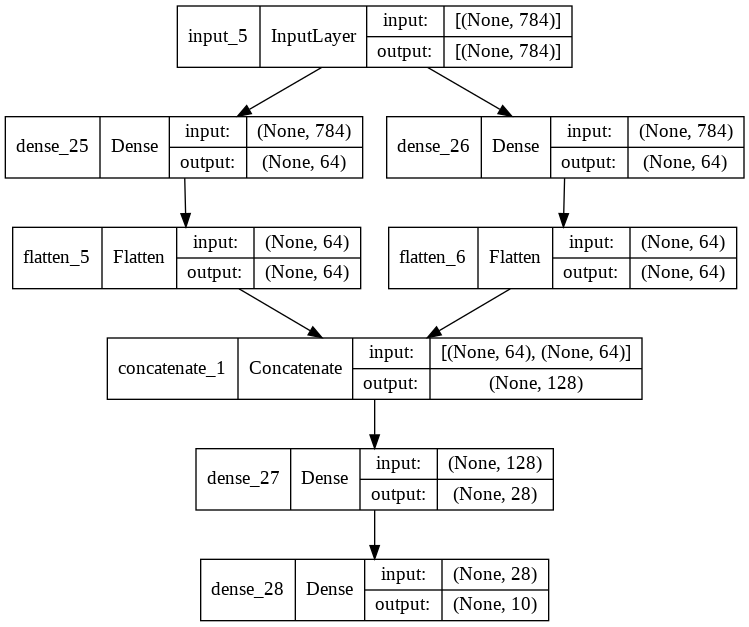

In [142]:
plot_model(modelH, show_shapes=True)

Epoch 1/100
   4/1646 [..............................] - ETA: 33s - loss: 2.3215 - categorical_accuracy: 0.1250 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1645/1646 [============================>.] - ETA: 0s - loss: 0.3005 - categorical_accuracy: 0.9118
Epoch 00001: val_loss did not improve from 0.00759
1646/1646 [==============================] - 42s 25ms/step - loss: 0.3004 - categorical_accuracy: 0.9118 - val_loss: 0.1495 - val_categorical_accuracy: 0.9586 - lr: 0.0010
Epoch 2/100
1644/1646 [============================>.] - ETA: 0s - loss: 0.1204 - categorical_accuracy: 0.9628
Epoch 00002: val_loss did not improve from 0.00759
1646/1646 [==============================] - 36s 22ms/step - loss: 0.1204 - categorical_accuracy: 0.9628 - val_loss: 0.1136 - val_categorical_accuracy: 0.9656 - lr: 0.0010
Epoch 3/100
1644/1646 [============================>.] - ETA: 0s - loss: 0.0825 - categorical_accuracy: 0.9745
Epoch 00003: val_loss did not improve from 0.00759
1646/1646 [==============================] - 36s 22ms/step - loss: 0.0825 - categorical_accuracy: 0.9745 - val_loss: 0.1142 - val_categorical_accuracy: 0.9658 - lr: 0.0010
Epoch 4/10

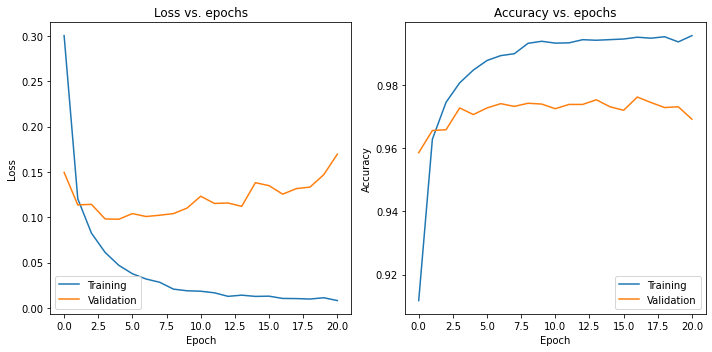

In [143]:
X_FtrainH = X_Ftrain[..., np.newaxis]
history_H = modelH.fit(X_FtrainH, y_train_balbi, validation_split=0.15, batch_size=28, 
                             epochs=100, verbose=1, callbacks = callback)

plot_history(modelH, history_H)

In [144]:
X_FtestH =  X_Ftest[...,np.newaxis]
score = modelH.evaluate(X_FtestH, y_test_class, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 11/313 [>.............................] - ETA: 3s - loss: 0.0963 - categorical_accuracy: 0.9773

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 4s 12ms/step - loss: 0.1344 - categorical_accuracy: 0.9607
Test loss: 0.13436730206012726
Test accuracy: 0.9606999754905701


In [145]:
eval_model_by_class(modelH, X_FtestH, y_test_classbi)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,index,y_true,y_pred,accurate_preds,label_count,class_acc,overall_acc
0,0,0,120,962,980,0.981633,0.9607
1,1,1,1199,1120,1135,0.986784,0.9607
2,2,2,2161,995,1032,0.964147,0.9607
3,3,3,3150,975,1010,0.965347,0.9607
4,4,4,4089,934,982,0.951120,0.9607
5,5,5,4430,848,892,0.950673,0.9607
6,6,6,5640,918,958,0.958246,0.9607
7,7,7,7055,977,1028,0.950389,0.9607
8,8,8,7601,928,974,0.952772,0.9607
9,9,9,8801,950,1009,0.941526,0.9607


In [147]:
#plot
def plot_randsamples_F(model, x_sample, y_label) :
  num_test_images = x_sample.shape[0]
  random_inx = np.random.choice(num_test_images, 5)
  random_test_images = x_sample[random_inx, ...]
  random_test_labels = y_label[random_inx, ...]

  predictions = model.predict(random_test_images)

  fig, axes = plt.subplots(5, 2, figsize=(16, 12))
  fig.subplots_adjust(hspace=0.4, wspace=-0.2)
  for a, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[a, 0].imshow(np.squeeze(image.reshape(*dims)), cmap = plt.cm.gist_gray)
    axes[a, 0].get_xaxis().set_visible(False)
    axes[a, 0].get_yaxis().set_visible(False)
    axes[a, 0].text(10., -1.5, f'Digit {label}')
    axes[a, 1].bar(np.arange(len(prediction)), prediction)
    axes[a, 1].set_xticks(np.arange(len(prediction)))
    axes[a, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

  plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


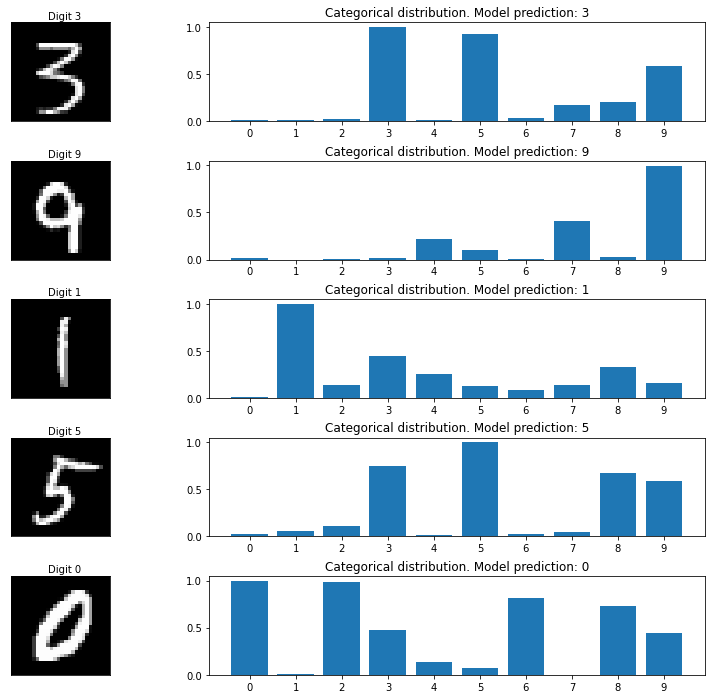

In [148]:
plot_randsamples_F(modelH,X_FtestH,ytest_label)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


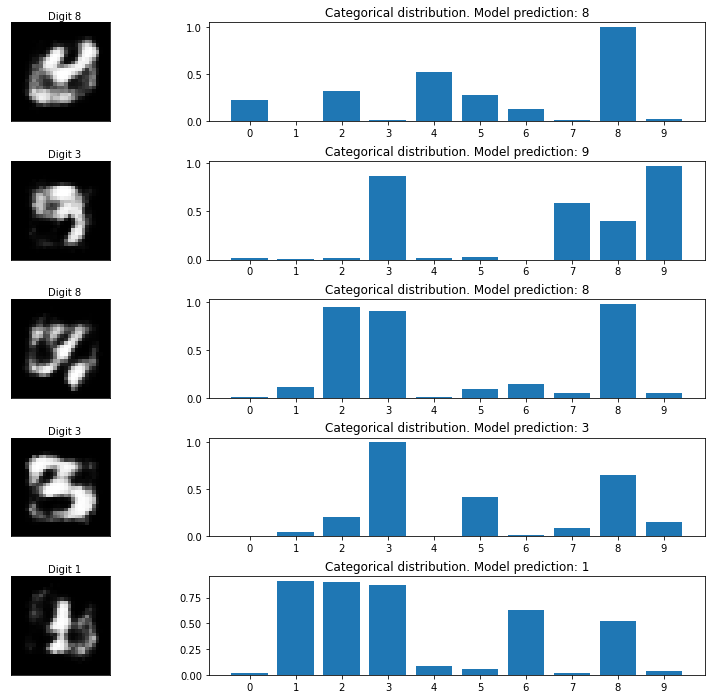

In [149]:
#try to predict autoencoder products
plot_randsamples_F(modelH,images,ytest_label)

# **presents top 5 predictions and probabilities**

In [150]:
# presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

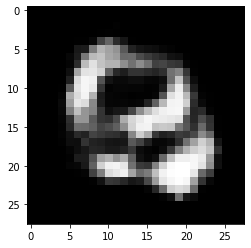

In [171]:
random_im = np.random.choice(images.shape[0])

plt.imshow(images[random_im].reshape(*dims))

In [172]:
preds = modelH.predict(images[random_im][np.newaxis,...,np.newaxis])
preds.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


(1, 10)

In [174]:
preds

array([[0., 1., 0., 0., 1., 1., 0., 1., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Model prediction : 1')

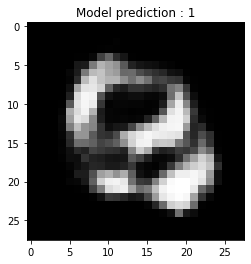

In [173]:
plt.imshow(images[random_im].reshape(*dims))
plt.title(f'Model prediction : {np.argmax(preds)}')

In [152]:
x = img_to_array(images)
print(images.shape)
print(x.shape)

(10000, 784)
(10000, 784, 1)


In [79]:
def get_top_5_predictions(model, img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

In [80]:
get_top_5_predictions(modelH, im)

IndexError: ignored

In [ ]:
get_top_5_predictions(image[1])

In [ ]:
input_size = X_train_bal[0].shape
hidden_size = 28
code_size = 32

input_img = Input(shape=(input_size))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(num_classes, activation='softmax')(hidden_2)

autoencoder_2 = Model(input_img, output_img)
autoencoder_2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5), 
                    loss= tf.keras.losses.SparseCategoricalCrossentropy(), 
                    metrics = [ tf.keras.metrics.SparseCategoricalAccuracy() ])

autoencoder_2.summary()

In [ ]:
history_auto = autoencoder_2.fit(X_train_bal,X_train_bal, validation_split= 0.15 , batch_size=28, epochs=10, verbose=1)

In [ ]:
# Alongside the image and label, show each model’s predictive distribution as a bar chart, 
num_test_images = X_test_scaled.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test_scaled[random_inx, ...]
random_test_labels = ytest_label[random_inx, ...]
16
images = autoencoder_2.predict(X_test_scaled)
predictions = model.predict(images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (prediction, image, label) in enumerate(zip(predictions, images, ytest_label)):
  axes[i, 0].imshow(np.squeeze(image), cmap = plt.cm.gist_gray)
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Digit {label}')
  axes[i, 1].bar(np.arange(len(prediction)), prediction)
  axes[i, 1].set_xticks(np.arange(len(prediction)))
  axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")